CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs
[[1. 1. 1. ... 1. 1. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [2. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]
 [2. 0. 0. ... 0. 0. 0.]]


[[ 3. -2.  0. ...  0.  0.  0.]
 [ 1.  1. -1. ...  0.  0.  0.]
 [ 0.  1.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1. -1.  0.]
 [ 0.  0.  0. ...  1.  1. -1.]
 [ 0.  0.  0. ...  0.  1.  0.]]


[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.01626124 1.0789337  ... 0.99942501 0.9995162  0.99958879]
 [1.         1.02439186 1.11026994 ... 0.99948216 0.9995618  0.99962509]
 ...
 [2.         2.         1.99999946 ... 1.00007236 1.00009428 1.00011309]
 [2.         1.99999946 1.99999225 ... 1.00009428 1.00011309 1.00012843]
 [2.         0.         0.         ... 0.         0.         0.        ]]


[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: DeprecationWarning: scipy.meshgrid is deprecated and will be removed in SciPy 2.0.0, use numpy.meshgrid instead


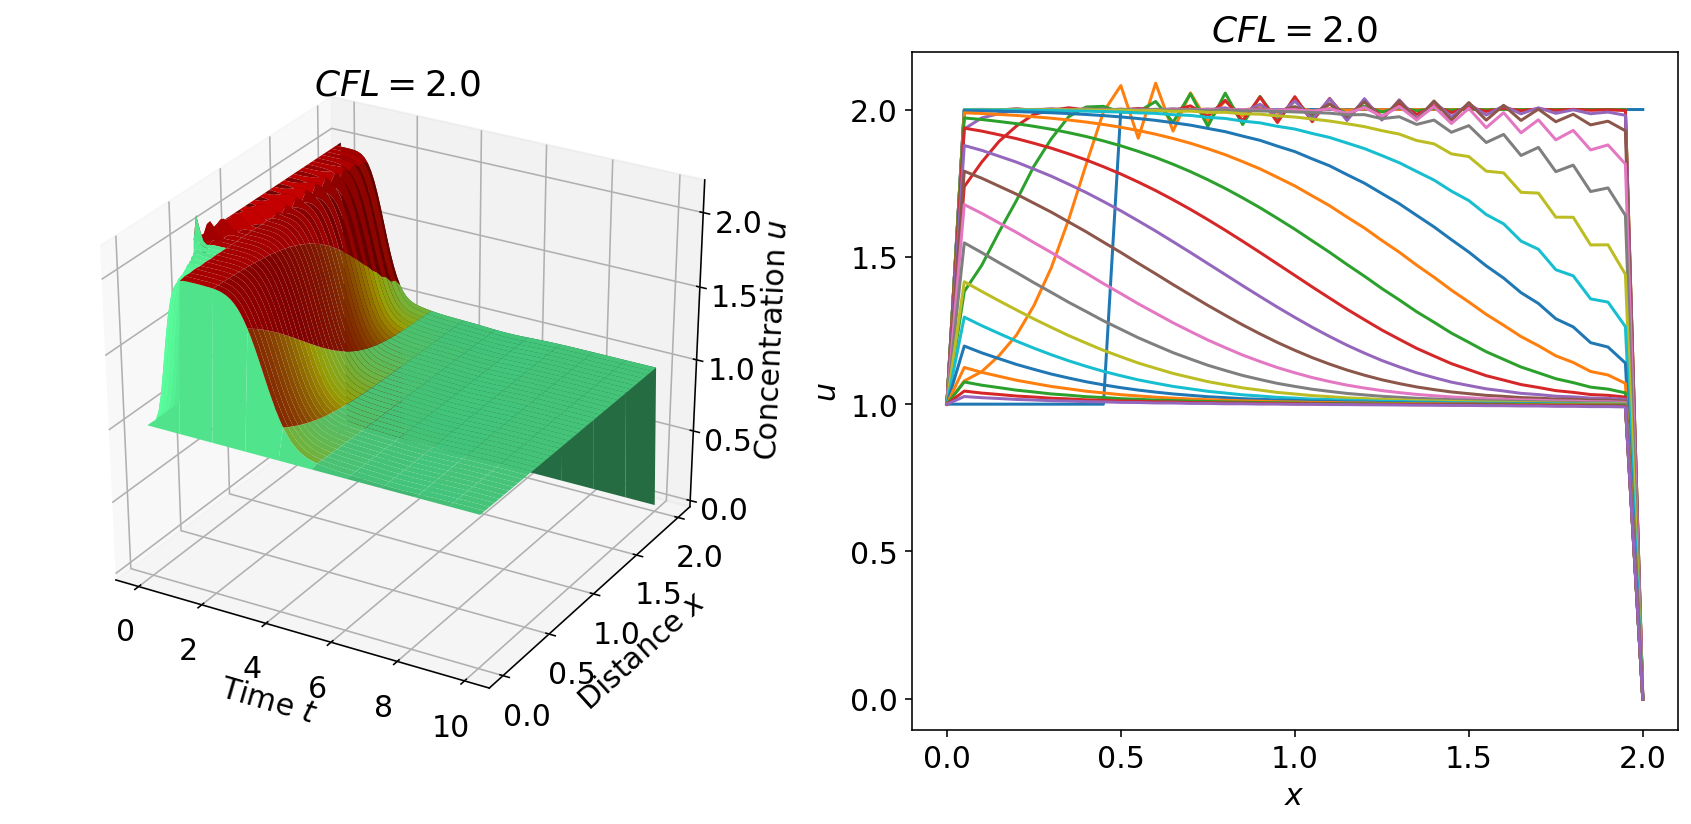

In [1]:
#Wave_func_evolver

%time
import matplotlib.pyplot as plt 
import cupy as cp 
import numpy as np
from timeit import default_timer as timer
from datetime import timedelta
from __future__ import division
from scipy import *
from mpl_toolkits.mplot3d import Axes3D  # 3d images
from matplotlib import cm                # colourmap
from scipy import linalg  

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # for those with HD screens

def implicitDiffusion():
  CFL = 2.0 #CFL Value

  x = cp.linspace(0,2,41) #X_with_steps
  t = cp.linspace(0,10,100) #T_with_dt
  u = cp.zeros((41,100)) #U_with_dt
  nx = 41 #number of divisions
  dx = 2 / (nx-1) #dx

  #Initial Condition
  u[:,0] = 1
  u[int(0.5 / dx):,0] = 2
  
  #Boundary Condition
  u[0,:] = 1

  print(u) #debugging
  print("\n") #debugging

  aa = cp.ones(38) #central diag
  bb = 1.0*cp.ones(39) #upper_t diag
  cc = -1.0*cp.ones(38) #lower_t diag
  A = cp.diag(aa,-1) + cp.diag(bb,0) + cp.diag(cc,1) #Matrix A acc to hint
  A[0,0]=3.0 #a41
  A[-1,-1]=0 #b1
  A[0,1]=-2.0 #c41

  print( A) #debugging
  print("\n") #debugging

  
  for time in range(1,100): #solve in dt
    u[1:-1,time] = cp.linalg.solve(A,u[1:-1,(time-1)]) #may be wrong
  
  print(u)
  print("\n")
  print(x)
    
  return cp.asnumpy(u), cp.asnumpy(x), cp.asnumpy(t), CFL


fig = plt.figure(figsize=(12,6))
plt.rcParams['font.size'] = 15

ax = fig.add_subplot(121, projection='3d')
ui, xi, ti, alphai = implicitDiffusion()
Ti, Xi = meshgrid(ti,xi)
N = ui/ui.max()
ax.plot_surface(Ti, Xi, ui, linewidth=0, facecolors=cm.jet(N),rstride=1, cstride=10 )
ax.set_xlabel('Time $t$')
ax.set_ylabel('Distance $x$')
ax.set_zlabel('Concentration $u$')
ax.set_title('$CFL = 2.0$')


plt.subplot(122)
for i in range(50):
    if i%2== 0:
        plt.plot(xi, ui[:,i])
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.title('$CFL = 2.0$')
plt.rcParams['font.size'] = 15
plt.tight_layout()



[[  1.     1.     1.   ...   1.     1.     1.  ]
 [ -8.95  -8.95  -8.95 ...  -8.95  -8.95  -8.95]
 [ -8.9   -8.9   -8.9  ...  -8.9   -8.9   -8.9 ]
 ...
 [-14.2  -14.2  -14.2  ... -14.2  -14.2  -14.2 ]
 [-14.1  -14.1  -14.1  ... -14.1  -14.1  -14.1 ]
 [-14.   -14.   -14.   ... -14.   -14.   -14.  ]]
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 9.95        9.96626124 10.0289337  ...  9.94942501  9.9495162
   9.94958879]
 [ 9.9         9.92439186 10.01026994 ...  9.89948216  9.8995618
   9.89962509]
 ...
 [16.2        16.2        16.19999946 ... 15.20007236 15.20009428
  15.20011309]
 [16.1        16.09999946 16.09999225 ... 15.10009428 15.10011309
  15.10012843]
 [16.         14.         14.         ... 14.         14.
  14.        ]]


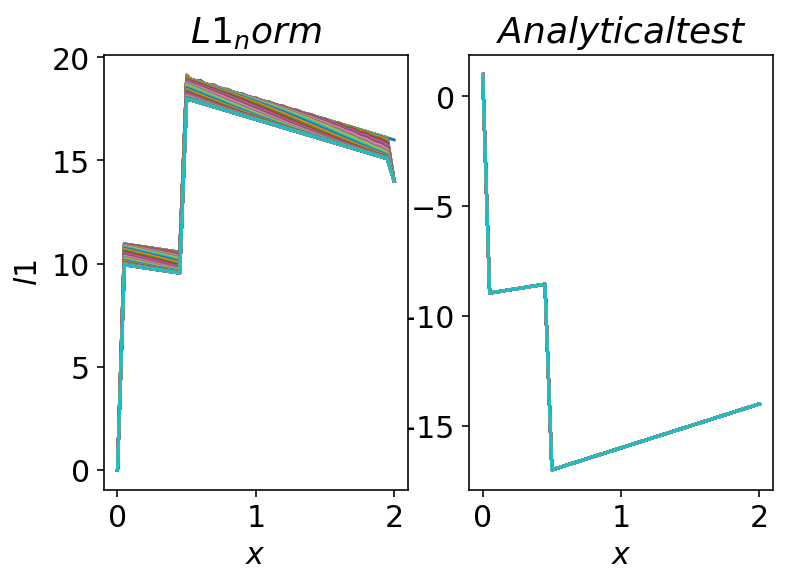

In [5]:
#L1_Norm_CPU

import matplotlib.pyplot as plt 
import cupy as cp 
import numpy as np
from timeit import default_timer as timer
from datetime import timedelta
from __future__ import division
from scipy import *
from mpl_toolkits.mplot3d import Axes3D  # 3d images
from matplotlib import cm                # colourmap
from scipy import linalg  


"""u= np.array([ 1.00000e+00, -4.09500e+03, -2.81500e+03,  2.79050e+04, -4.73500e+03,
 -8.95990e+04,  3.28010e+04 ,1.79681e+05, -6.20590e+04, -2.47359e+05,
  5.19940e+04,  2.37294e+05 ,-4.44600e+03, -1.51326e+05, -2.89260e+04,
  5.59380e+04,  2.32980e+04 ,-7.42200e+03, -6.14200e+03, -1.02200e+03,
  2.00000e+00,  2.00000e+00 ,2.00000e+00,  2.00000e+00,  2.00000e+00,
  2.00000e+00,  2.00000e+00 ,2.00000e+00,  2.00000e+00,  2.00000e+00,
  2.00000e+00,  2.00000e+00 ,2.00000e+00,  2.00000e+00,  2.00000e+00,
  2.00000e+00,  2.00000e+00 ,2.00000e+00,  2.00000e+00,  2.00000e+00,
  2.00000e+00,]) #Sample U from broken Q_"""

u_an = np.ones((41,100)) 

dx = 2 / (41-1)    #numpy function ones()
u_an0=np.ones(41)
u_an0[int(0.5 / dx):] = 2
x = np.linspace(0,2,41)
t=10

for time in range(10):
  for i in range(1,41):
    u_an[i]=u_an0[i]*(x[i]-time)
print(u_an)

plt.subplot(122)
plt.plot(x,u_an)
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.title('$Analytical test$')
plt.rcParams['font.size'] = 15

#L1_Norm
l1 = np.abs(np.subtract(cp.asnumpy(ui),u_an))
print(l1)

plt.subplot(121)
plt.plot(x,l1)
plt.xlabel('$x$')
plt.ylabel('$l1$')
plt.title('$L1_norm$')
plt.rcParams['font.size'] = 15

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[ 1.00000e+00 -4.09500e+03 -2.81500e+03  2.79050e+04 -4.73500e+03
 -8.95990e+04  3.28010e+04  1.79681e+05 -6.20590e+04 -2.47359e+05
  5.19940e+04  2.37294e+05 -4.44600e+03 -1.51326e+05 -2.89260e+04
  5.59380e+04  2.32980e+04 -7.42200e+03 -6.14200e+03 -1.02200e+03
  2.00000e+00  2.00000e+00  2.00000e+00  2.00000e+00  2.00000e+00
  2.00000e+00  2.00000e+00  2.00000e+00  2.00000e+00  2.00000e+00
  2.00000e+00  2.00000e+00  2.00000e+00  2.00000e+00  2.00000e+00
  2.00000e+00  2.00000e+00  2.00000e+00  2.00000e+00  2.00000e+00
  2.00000e+00]


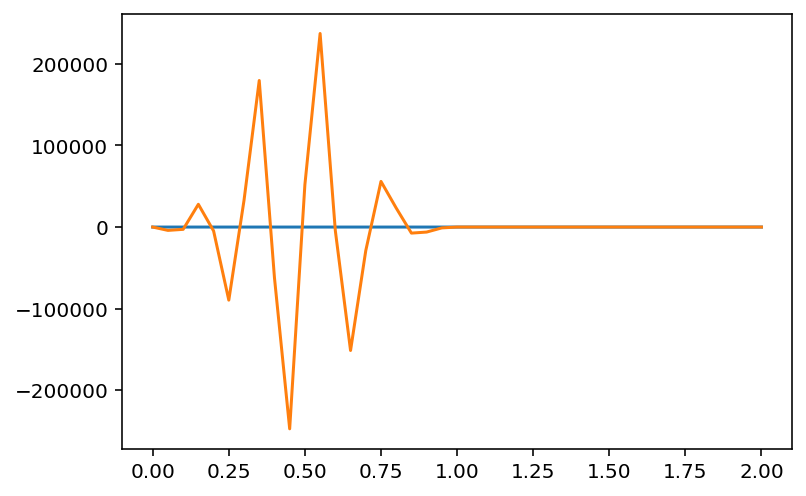

In [ ]:
#Wave_func_evolver_Naive
#This is just a trial function
import numpy                       #here we load numpy
from matplotlib import pyplot      #here we load matplotlib
import time, sys                   #and load some utilities

#this makes matplotlib plots appear in the notebook (instead of a separate window)
%matplotlib inline

nx = 41  # try changing this number from 41 to 81 and Run All ... what happens?
dx = 2 / (nx-1)
nt = 10    #nt is the number of timesteps we want to calculate
dt = .05  #dt is the amount of time each timestep covers (delta t)
c = 1      #assume wavespeed of c = 1

u = numpy.ones(nx)      #numpy function ones()
u[int(0.5 / dx):] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
print(u)

pyplot.plot(numpy.linspace(0, 2, nx), u);

un = numpy.ones(nx) #initialize a temporary array

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx-1): ## you can try commenting this line and...
    #for i in range(nx): ## ... uncommenting this line and see what happens!
        u[i] = un[i] - 2.0* (un[i+1] - un[i-1])
print(u)

pyplot.plot(numpy.linspace(0, 2, nx), u);


CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.53 µs
0:00:00.000701


[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.  ]


[ 1.00000000e+00 -2.95240000e+04  2.80483000e+05 -1.48360600e+06
  5.75358700e+06 -1.82332240e+07  4.99914370e+07 -1.22774404e+08
  2.76373078e+08 -5.79554056e+08  1.14570416e+09 -2.15456218e+09
  3.88165393e+09 -6.73730932e+09  1.13174221e+10 -1.84684151e+10
  2.93691943e+10 -4.56332182e+10  6.94341674e+10 -1.03659081e+11
  1.52093229e+11 -2.19641401e+11  3.12590750e+11 -4.38920759e+11
  6.08666416e+11 -8.34341136e+11  1.13142654e+12 -1.51893668e+12
  2.02006493e+12 -2.66292221e+12  3.48137606e+12 -4.51600029e+12
  5.81514607e+12 -7.43614555e+12  9.44665997e+12 -1.19261850e+13
  1.49677263e+13 -1.86796603e+13  2.31877936e+13 -2.86376379e+13
  3.51969161e+13]




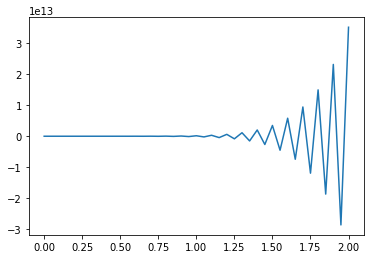

In [ ]:
#Naive_CPU
%time
import matplotlib.pyplot as plt 
import numpy as np 
from timeit import default_timer as timer
from datetime import timedelta



x = np.linspace(0,2,41) #41 steps (Random value)
u = np.zeros(41)  #Initial value (set random for now)
CFL = 2.0
u[0]=1

iterations = 10 # No of Iterations
start = timer()
#Sample unomptimized program for Q1 in general case:
for time in range(10):
    u[0]= (1 if x[time]<=0.5 else 2)
    for i in range(1,41):
        u[i] += u[i] - (CFL*(u[i-1]-u[i])/2)


end = timer()
print(timedelta(seconds=end-start))
print("\n")

print(x)
print("\n")
print(u)

plt.plot(x,u)
print("\n")

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.77 µs
0:00:00.266037


[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.  ]


[ 1.00000000e+00 -2.95240000e+04  2.80483000e+05 -1.48360600e+06
  5.75358700e+06 -1.82332240e+07  4.99914370e+07 -1.22774404e+08
  2.76373078e+08 -5.79554056e+08  1.14570416e+09 -2.15456218e+09
  3.88165393e+09 -6.73730932e+09  1.13174221e+10 -1.84684151e+10
  2.93691943e+10 -4.56332182e+10  6.94341674e+10 -1.03659081e+11
  1.52093229e+11 -2.19641401e+11  3.12590750e+11 -4.38920759e+11
  6.08666416e+11 -8.34341136e+11  1.13142654e+12 -1.51893668e+12
  2.02006493e+12 -2.66292221e+12  3.48137606e+12 -4.51600029e+12
  5.81514607e+12 -7.43614555e+12  9.44665997e+12 -1.19261850e+13
  1.49677263e+13 -1.86796603e+13  2.31877936e+13 -2.86376379e+13
  3.51969161e+13]


CPU times: user 2 µs, sys: 0 ns, total

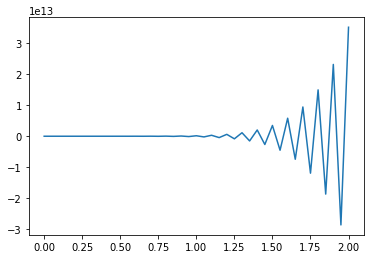

In [ ]:
#Naive_GPU
%time
import matplotlib.pyplot as plt 
import cupy as cp 
from timeit import default_timer as timer
from datetime import timedelta



x = cp.linspace(0,2,41) #41 steps (Random value)
u = cp.zeros(41)  #Initial value (set random for now)
CFL = 2.0
u[0]=1

iterations = 10 # No of Iterations
start = timer()
#Sample unomptimized program for Q1 in general case:
for time in range(10):
    u[0]= (1 if x[time]<=0.5 else 2)
    for i in range(1,41):
        u[i] += u[i] - (CFL*(u[i-1]-u[i])/2)


end = timer()
print(timedelta(seconds=end-start))
print("\n")

print(x)
print("\n")
print(u)

plt.plot(cp.asnumpy(x),cp.asnumpy(u))
print("\n")
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
0:00:02.406827


[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35
 1.4  1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.  ]


[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -1.59167093e+17
  -2.52702240e+17 -3.96789446e+17]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ... -1.28130551e+18
  -2.07804115e+18 -3.33163529e+18]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -1.58084047e+32
  -4.51418643e+32 -1.26278801e+33]
 [ 0.00000000e+00  0.00000000e+00  2.00000000e+00 ... -2.00057784e+32
  -5.79956218e+32 -1.64655396e+33]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


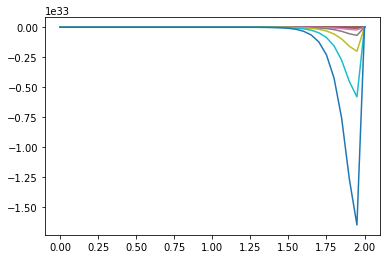



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


In [ ]:
#Test_GPU
%time
import matplotlib.pyplot as plt 
import cupy as cp 
import numpy as np
from timeit import default_timer as timer
from datetime import timedelta

x = cp.linspace(0,2,41) #41 steps (Random value)
u = cp.zeros((41,41))  #Initial value (set random for now)
CFL = 2.0
u[0]=1

iterations = 10 # No of Iterations
start = timer()
#Sample unomptimized program for Q1 in general case:
for time in range(10):
    u[0]= (1 if x[time]<=0.5 else 2)
    for i in range(1,40):
      for j in range(1,40):
        u[i][j+1] += u[i][j] - (CFL*(u[i+1][j+1]-u[i-1][j+1])/2)

    

end = timer()
print(timedelta(seconds=end-start))
print("\n")

print(x)
print("\n")
print(u)


plt.plot(cp.asnumpy(x),cp.asnumpy(u))
plt.show()

from matplotlib import cm
from mpl_toolkits import mplot3d

print("\n")
%time